In [56]:
#install specific version of libraries used in lab
%pip install pandas
%pip install numpy
%pip install scipy
%pip install seaborn
%pip install matplotlib
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [109]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

In [20]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

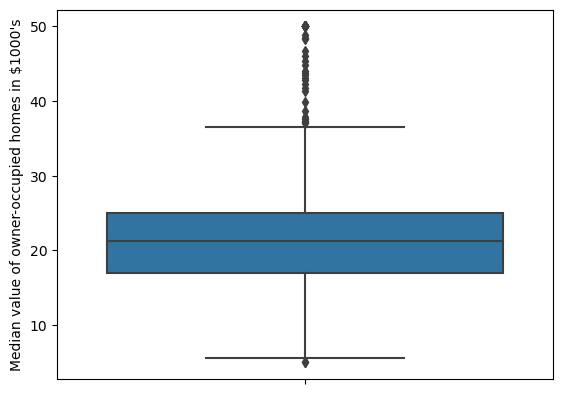

In [49]:
# For the "Median value of owner-occupied homes" provide a boxplot

AX = sns.boxplot(y="MEDV", data=boston_df)
AX.set(ylabel = "Median value of owner-occupied homes in $1000's")
plt.show()

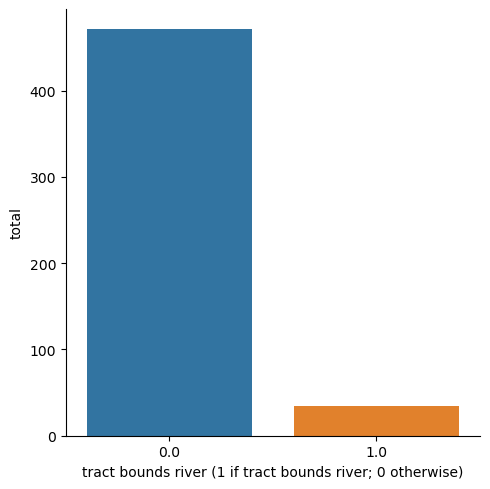

In [50]:
# Provide a  bar plot for the Charles river variable

AX = sns.catplot(x='CHAS', kind='count', data=boston_df)
AX.set(xlabel = "tract bounds river (1 if tract bounds river; 0 otherwise)" 
       , ylabel = "total")
plt.show()


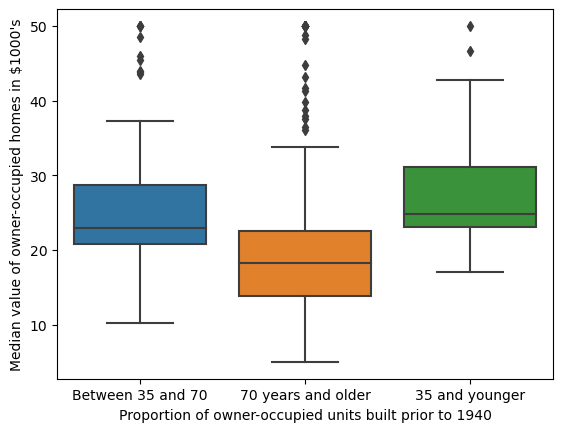

In [51]:
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df.loc[boston_df['AGE'] <= 30, 'Age Group'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 30) & (boston_df['AGE'] < 70) , 'Age Group'] = "Between 35 and 70"
boston_df.loc[boston_df['AGE'] >= 70, 'Age Group'] = "70 years and older"

ax = sns.boxplot(x='Age Group', y='MEDV', data=boston_df)
ax.set(xlabel = "Proportion of owner-occupied units built prior to 1940"
           , ylabel = "Median value of owner-occupied homes in $1000's")
plt.show()

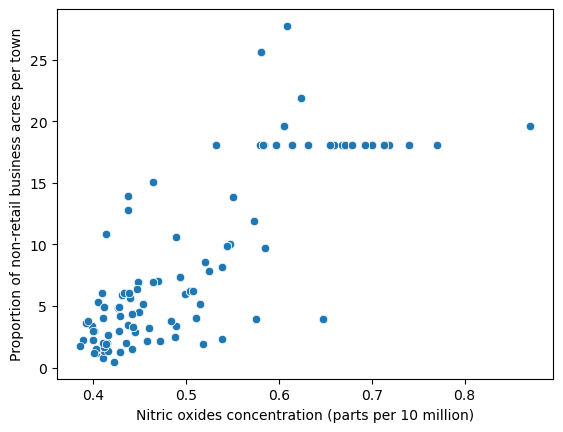

In [52]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
ax.set(xlabel = "Nitric oxides concentration (parts per 10 million)"
           , ylabel = "Proportion of non-retail business acres per town")
plt.show()

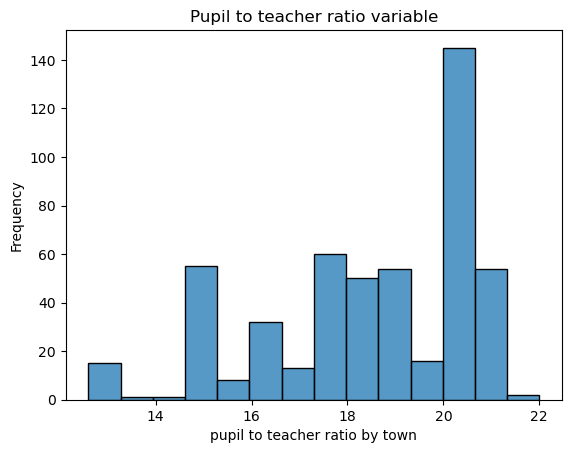

In [53]:
# Create a histogram for the pupil to teacher ratio variable

ax = sns.histplot(boston_df['PTRATIO'], kde = False)
ax.set(title = "Pupil to teacher ratio variable"
           , ylabel = "Frequency"
       , xlabel = "pupil to teacher ratio by town")
plt.show()

In [72]:
# --------------------------------1--------------------------------
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

# H0 = there is no difference in median value of houses bounded by charles river
# H1 = there is a difference in median value of houses bounded by charles river

In [70]:
ss.levene(boston_df['MEDV'], boston_df['CHAS'], center = 'mean')

LeveneResult(statistic=532.6811164157666, pvalue=5.402535119732986e-95)

In [69]:
ss.ttest_ind(boston_df['MEDV'], boston_df['CHAS'], equal_var = True)

Ttest_indResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305)

In [73]:
# pvalue > 0,05
# Conclussion: fail to reject H0, so there is no difference in median value of houses bounded by charles river

In [75]:
# --------------------------------2--------------------------------
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

# H0 = there is no difference in median value for each proportion owner occupied unit built to 1940
# H1 = there is a difference in median value for each proportion owner occupied unit built to 1940

In [101]:
from scipy.stats import f_oneway

thirtyfive_younger = boston_df[boston_df['Age Group'] == '35 and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['Age Group'] == 'Between 35 and 70']['MEDV']
seventy_older = boston_df[boston_df['Age Group'] == '70 years and older']['MEDV']

ss.f_oneway(thirtyfive_younger, thirtyfive_seventy, seventy_older)

F_onewayResult(statistic=34.249179272635395, pvalue=1.135217093487225e-14)

In [ ]:
# pvalue > 0,05
# Conclussion: fail to reject H0, so there is no difference in median value for each proportion owner occupied unit built to 1940

In [ ]:
# --------------------------------3--------------------------------
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

# H0 = there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres / town
# H1 = there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres / town

In [104]:
ss.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061239593e-98)

In [ ]:
# pvalue > 0,05
# Conclussion: fail to reject H0, so there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres / town

In [ ]:
# --------------------------------4--------------------------------
# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

# H0 = the re is no impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes
# H1 = the re is an impact of additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes

In [110]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 16 Jun 2023   Prob (F-statistic):           1.21e-08
Time:                        01:57:57   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# pvalue < 0,05
# Conclussion: reject H0, so there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres / town